In [1]:
# 匯入資料
import pandas as pd
data = pd.read_csv('diabetes.csv')
data[:3]

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0


In [2]:
#X 前面四個欄位的數值 #y 最後一個欄位的數值
X, y = data.iloc[:, 1:-1].values, data.iloc[:, -1].values

In [3]:
# 分割全部數據成為 訓練與驗證資料區 # sklearn.model_selection.train_test_split 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12000, 8), (3000, 8), (12000,), (3000,))

In [5]:
## https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
# 換成 MLPClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train) 

RandomForestClassifier()

In [6]:
model.predict(X_test), y_test # score model

(array([0, 0, 1, ..., 1, 1, 0], dtype=int64),
 array([0, 0, 1, ..., 1, 1, 1], dtype=int64))

In [7]:
model.score(X_test, y_test) 

0.9293333333333333

In [11]:
# 特徵的重要性
# print(dir(model))
data.columns[1:-1],  model.feature_importances_

(Index(['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
        'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age'],
       dtype='object'),
 array([0.31075876, 0.0899972 , 0.04752489, 0.05461383, 0.11687755,
        0.17979411, 0.0429133 , 0.15752036]))

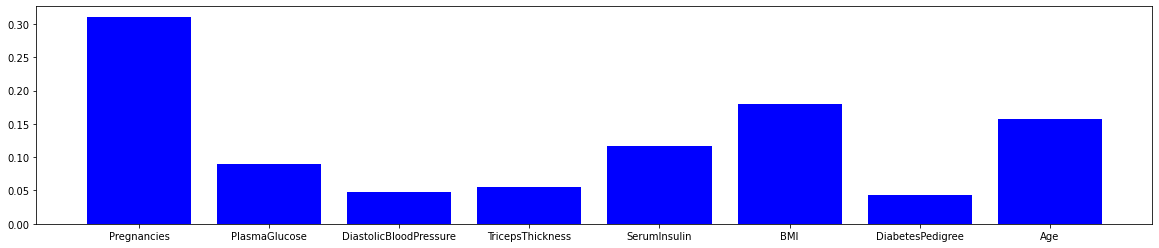

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
plt.bar( data.columns[1:-1],  model.feature_importances_ ,color = 'blue' )
plt.show()

In [24]:
importance = {'cols' : data.columns[1:-1]  , 'vals': model.feature_importances_}
pd.DataFrame(importance).sort_values(by='vals', ascending = False)

,cols,vals
0,Pregnancies,0.310759
5,BMI,0.179794
7,Age,0.157520
4,SerumInsulin,0.116878
1,PlasmaGlucose,0.089997
3,TricepsThickness,0.054614
2,DiastolicBloodPressure,0.047525
6,DiabetesPedigree,0.042913
